In [1]:
# Victor Z and Leo Gonzalez
# UW-Madison, 2024
# estimation for Hougen-Watson equation

import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import t

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# define model
def myf(x, b1, b2, b3, b4, b5):
    if len(x.shape) == 1:
        x = x.reshape(1, -1)

    x1 = x[:, 0]
    x2 = x[:, 1]
    x3 = x[:, 2]

    y = (b1*x2-x3/b5)/(1+b2*x1+b3*x2+b4*x3)

    return y

In [4]:
# load data
path = '/content/drive/MyDrive/StatsBookCode/Python/'
filename=path+'/Data/hougenwatson.dat'

data = np.loadtxt(filename);
X = data[:, :3]                                 # partial pressures
y = data[:, -1]                                 # reaction rate
n, m = X.shape

# best guess for parameters
beta = np.array([[1.0000e+00],
                 [5.0000e-02],
                 [2.0000e-02],
                 [1.0000e-01],
                 [2.0000e+00]])

In [5]:
# span SSE function using one parameter
nmesh = 1000
bv = np.linspace(-2, 2, nmesh)
betav = beta.copy()

yhat = np.zeros(n)
e = np.zeros(n)
SSE = np.zeros(nmesh)

# evaluate function
for j in range(nmesh):
    betav[1] = bv[j]
    for i in range(n):
        yhat[i] = myf(X[i], *betav)[0]
        e[i] = 0.5*(y[i]-yhat[i])**2
    SSE[j] = np.sum(e)

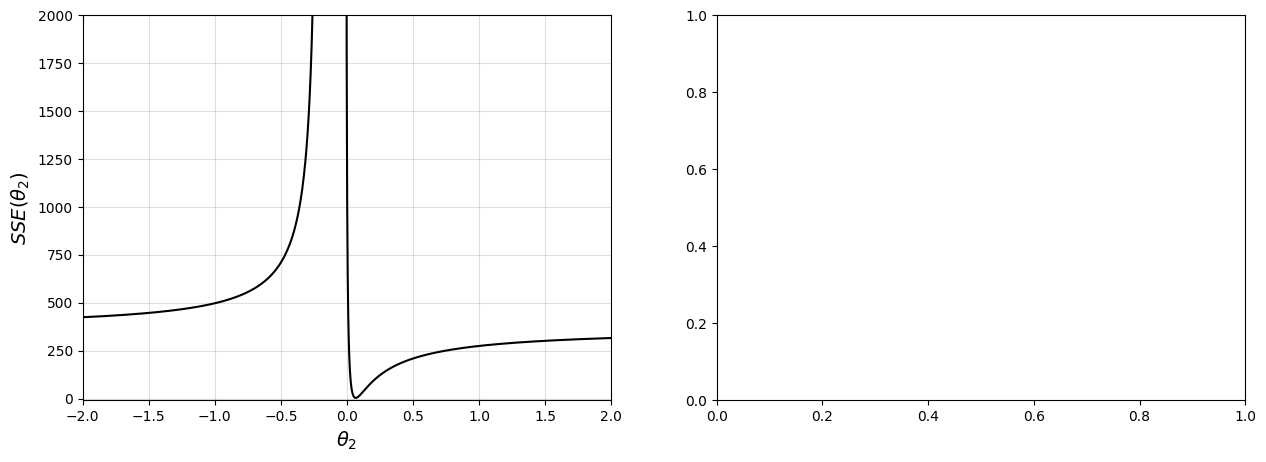

In [6]:
# plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [15, 5])
ax1.grid(color = 'gray', axis = 'both', alpha = 0.25)
ax1.set_axisbelow(True)
ax1.set_xlabel(r'$\theta_2$', fontsize = 14)
ax1.set_xlim(-2, 2)
ax1.set_ylabel(r'$SSE(\theta_2)$', fontsize = 14)
ax1.set_ylim(-10, 2000)
ax1.plot(bv, SSE, 'k-', linewidth = 1.5)

In [7]:
# span another param
bv = np.linspace(-50, 50, nmesh)

# evaluate function
for j in range(nmesh):
    betav[0] = bv[j]
    for i in range(n):
        yhat[i] = myf(X[i], *betav)[0]
        e[i] = 0.5*(y[i]-yhat[i])**2
    SSE[j] = np.sum(e)

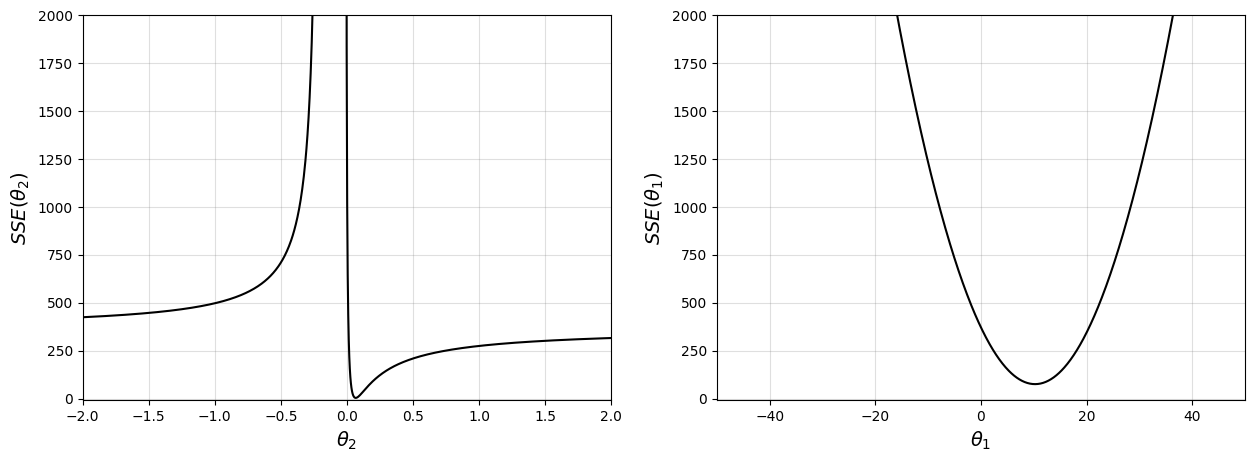

In [8]:
# plot results
ax2.grid(color = 'gray', axis = 'both', alpha = 0.25)
ax2.set_axisbelow(True)
ax2.set_xlabel(r'$\theta_1$', fontsize = 14)
ax2.set_xlim(-50, 50)
ax2.set_ylabel(r'$SSE(\theta_1)$', fontsize = 14)
ax2.set_ylim(-10, 2000)
ax2.plot(bv, SSE, 'k-', linewidth = 1.5)
fig

In [9]:
# do estimation with good initial guess
beta = np.ones(5)
beta_opt1, beta_cov1 = curve_fit(myf,
                                 X,
                                 y,
                                 p0 = beta,
                                 method = 'lm')
yhat1 = myf(X, *beta_opt1)

# calculate confidence intervals
alpha = 0.05
d_y = len(y)
d_beta = len(beta_opt1)
dof = max(0, d_y-d_beta)
t_val = t.ppf(1-alpha/2, dof)
ci1 = []

for i, (beta, var) in enumerate(zip(beta_opt1, np.diag(beta_cov1))):
    sigma = var**0.5
    ci1.append((beta-sigma*t_val, beta+sigma*t_val))

print(f'Coefficient confidence intervals are: {ci1}')

Coefficient confidence intervals are: [(-0.7467361705347983, 3.2519064101599717), (-0.03767542719714327, 0.16322696908534218), (-0.031172299834976304, 0.11126774575029677), (-0.06089679465904048, 0.28572624650462886), (-0.7380677636545776, 3.12082396748589)]


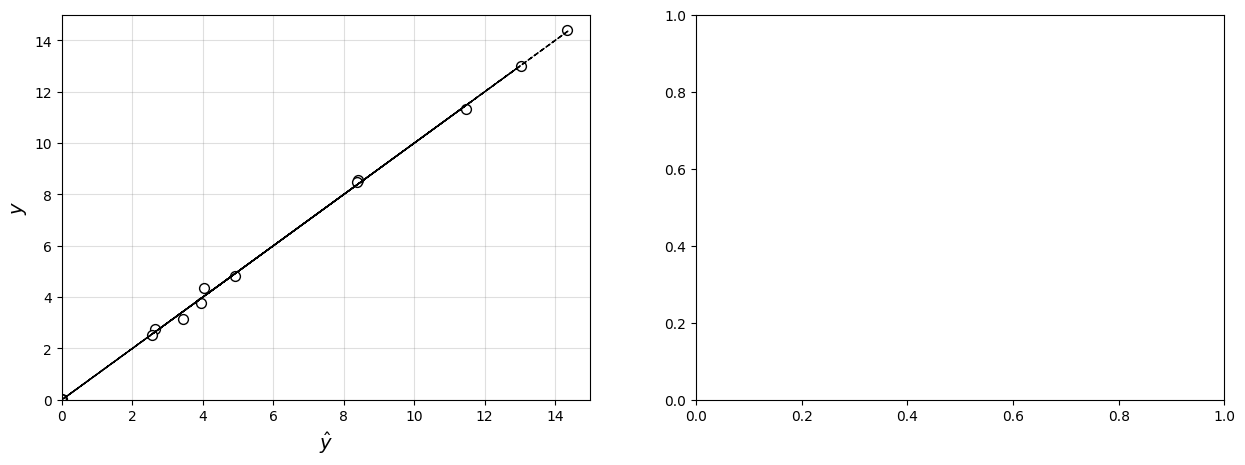

In [10]:
# plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [15, 5])
ax1.grid(color = 'gray', axis = 'both', alpha = 0.25)
ax1.set_axisbelow(True)
ax1.set_xlabel(r'$\hat{y}$', fontsize = 14)
ax1.set_xlim(0, 15)
ax1.set_ylabel(r'$y$', fontsize = 14)
ax1.set_ylim(0, 15)
ax1.scatter(yhat1, y, marker = 'o', color = 'w', edgecolor = 'k', s = 50)
ax1.plot(y, y, 'k--', linewidth = 1)

In [11]:
# do estimation with bad initial guess
beta = -np.ones(5)
beta_opt2, beta_cov2 = curve_fit(myf,
                                 X,
                                 y,
                                 p0 = beta,
                                 method = 'lm')
yhat2 = myf(X, *beta_opt2)


# calculate confidence intervals
alpha = 0.05
d_y = len(y)
d_beta = len(beta_opt2)
dof = max(0, d_y-d_beta)
t_val = t.ppf(1-alpha/2, dof)
ci2 = []

for i, (beta, var) in enumerate(zip(beta_opt2, np.diag(beta_cov2))):
    sigma = var**0.5
    ci2.append((beta-sigma*t_val, beta+sigma*t_val))

print(f'Coefficient confidence intervals are: {ci2}')

Coefficient confidence intervals are: [(-inf, inf), (-inf, inf), (-inf, inf), (-inf, inf), (-inf, inf)]


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


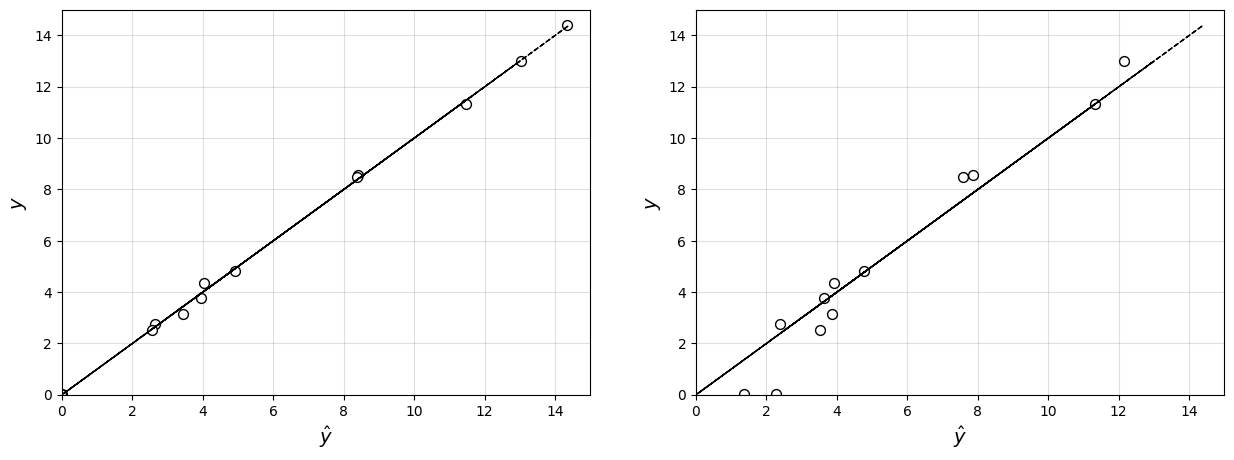

In [12]:
# plot results
ax2.grid(color = 'gray', axis = 'both', alpha = 0.25)
ax2.set_axisbelow(True)
ax2.set_xlabel(r'$\hat{y}$', fontsize = 14)
ax2.set_xlim(0, 15)
ax2.set_ylabel(r'$y$', fontsize = 14)
ax2.set_ylim(0, 15)
ax2.scatter(yhat2, y, marker = 'o', color = 'w', edgecolor = 'k', s = 50)
ax2.plot(y, y, 'k--', linewidth = 1)
fig